# Understand Why Probability Maps Look Different in Fiji

by [Qin Yu](https://github.com/qin-yu), Apr 2022

In [10]:
import glob
import tifffile
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint
from natsort import natsorted

## Raw Data

In [11]:
path_folder_raw_input = "/g/kreshuk/yu/Datasets/TMody2021Ovules/.original_prob_compare/"
list_file_raw_input = natsorted(glob.glob(path_folder_raw_input + "*.tif"))
pprint(list_file_raw_input)

['/g/kreshuk/yu/Datasets/TMody2021Ovules/.original_prob_compare/1731_nstain.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original_prob_compare/1732_nstain.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original_prob_compare/1733_nstain.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original_prob_compare/1734_nstain.tif']


In [12]:
img_list = []
for raw_file in list_file_raw_input:
    img_list.append(tifffile.imread(raw_file))

In [13]:
[img.shape for img in img_list]

[(261, 1360, 1360), (165, 1104, 1104), (264, 1024, 1024), (376, 1944, 1944)]

## Probability Maps

In [14]:
path_folder_probability_maps = "/g/kreshuk/yu/Outputs/TMody2021Ovules/compare_prob/"
list_file_probability_maps = natsorted(glob.glob(path_folder_probability_maps + "*prob.tif"))
pprint(list_file_probability_maps)

['/g/kreshuk/yu/Outputs/TMody2021Ovules/compare_prob/1731_nstain_prob.tif',
 '/g/kreshuk/yu/Outputs/TMody2021Ovules/compare_prob/1732_nstain_prob.tif',
 '/g/kreshuk/yu/Outputs/TMody2021Ovules/compare_prob/1733_nstain_prob.tif',
 '/g/kreshuk/yu/Outputs/TMody2021Ovules/compare_prob/1734_nstain_prob.tif']


In [15]:
list_img_prob_maps = []
for file_probability_map in list_file_probability_maps:
    list_img_prob_maps.append(tifffile.imread(file_probability_map))

In [16]:
[img.shape for img in list_img_prob_maps]

[(261, 1360, 1360), (165, 1104, 1104), (264, 1024, 1024), (376, 1944, 1944)]

In [8]:
list_histogram, list_bin_edges = [], []
for img_prob_map in list_img_prob_maps:
    histogram, bin_edges = np.histogram(img_prob_map, bins=256)
    list_histogram.append(histogram)
    list_bin_edges.append(bin_edges)

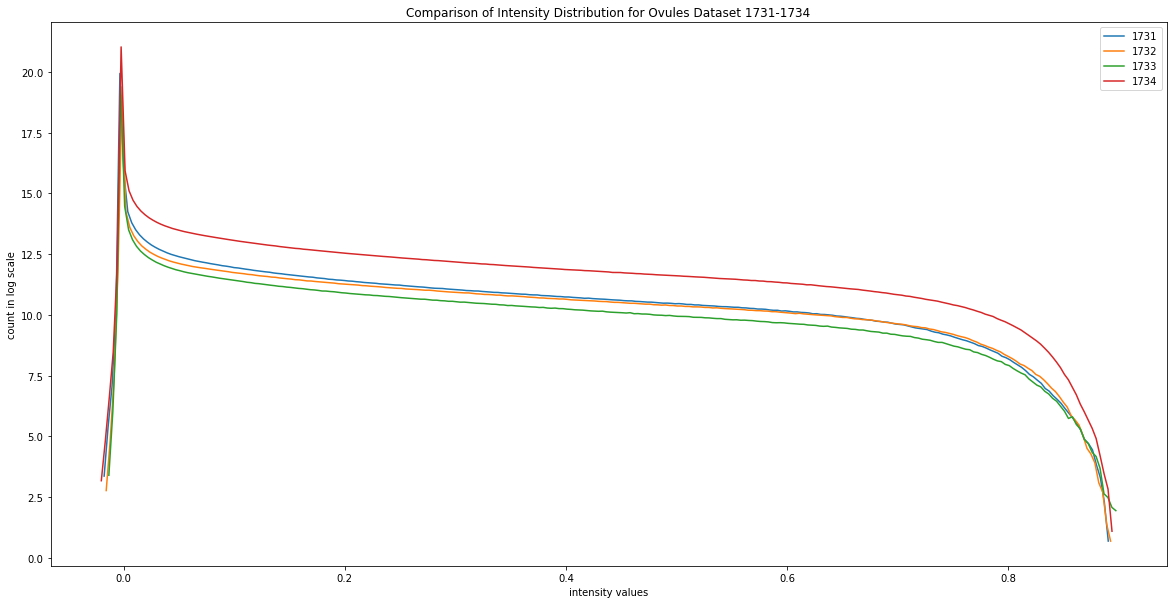

In [9]:
plt.figure(figsize=(20, 10))
for histogram, bin_edges, dset in zip(list_histogram, list_bin_edges, range(1731, 1735)):
    plt.plot(bin_edges[0:-1], np.log(histogram), label=f'{dset}')
plt.title("Comparison of Intensity Distribution for Ovules Dataset 1731-1734")
plt.xlabel("intensity values")
plt.ylabel("count in log scale")
plt.legend()